<h1>How can we control the increasing number of accidents in New York?</h1>

**Analysis by Andres Mauricio Herrera Alvarez**

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [2]:
print("Started Reading JSON file")

with open("data/borough_data.json", "r") as read_file:
    print("Converting JSON encoded data into Python dictionary" + '\n')
    cities = json.load(read_file)

    print("Decoded JSON Data From File")
    for key, value in cities.items():
        print(key, ":", value)
    print("Done reading json file")

Started Reading JSON file
Converting JSON encoded data into Python dictionary

Decoded JSON Data From File
the bronx : {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1}
brooklyn : {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82}
manhattan : {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83}
queens : {'name': 'queens', 'population': 2358582.0, 'area': 108.53}
staten island : {'name': 'staten island', 'population': 479458.0, 'area': 58.37}
Done reading json file


<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

In [3]:
df = pd.read_csv('data/accidents.csv', sep=";")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [4]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 :</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[] Automated pedestrian detection</li>
<li>[X] Road safety audits at high risk locations</li>
<li>[] Expansion in the cycle track network</li>
<li>[X] Targeted education and awareness initiatives</li>
<li>[X] Creation of pedestrian refuge islands</li>
<li>[X] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

From the analysis of the data we could develop safety plans for a particular city and month, thus creating more pedetrian refuge islands and speed humps in high risk locations

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 :</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

In [5]:
%%time
df["DATE"] = pd.to_datetime(df["DATE"])

CPU times: user 30.5 s, sys: 49.8 ms, total: 30.6 s
Wall time: 30.6 s


In [6]:
df = df.sort_values(by="DATE")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
237229,2018-01-01,19:30,QUEENS,11432.0,40.708410,-73.80328,PARSONS BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3820560,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
230620,2018-01-01,4:00,BROOKLYN,11212.0,40.659330,-73.92027,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,3821032,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
235340,2018-01-01,13:30,QUEENS,11372.0,40.747734,-73.88300,83 STREET,0,0,0,...,NaN,NaN,NaN,NaN,3821647,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
230632,2018-01-01,21:30,BROOKLYN,11234.0,40.619130,-73.92398,EAST 53 STREET,1,0,0,...,NaN,NaN,NaN,NaN,3821772,NaN,NaN,NaN,NaN,NaN
228737,2018-01-01,17:36,QUEENS,11417.0,40.675060,-73.85148,PITKIN AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3819065,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


Text(0.5,1.02,'Distribution of Accidents')

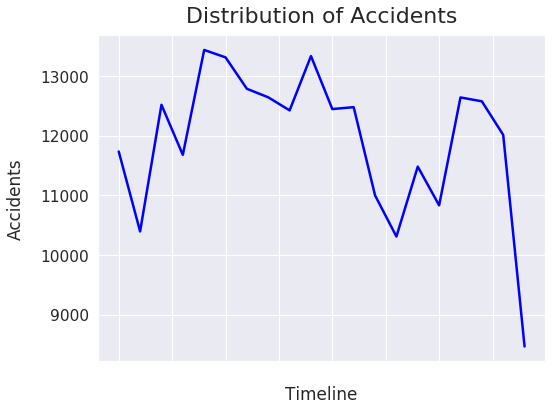

In [7]:
import datetime as dt

sns.set(font_scale=1.4)
total_accidents = df['DATE'].groupby([df.DATE.dt.year, df.DATE.dt.month]).agg('count').plot(kind='line', figsize=(8, 6), linewidth=2.5, color='blue')
plt.xlabel("Timeline", labelpad=15)
plt.ylabel("Accidents", labelpad=15)
plt.title("Distribution of Accidents", y=1.02, fontsize=22)

Data Exploration of injured and kills over time

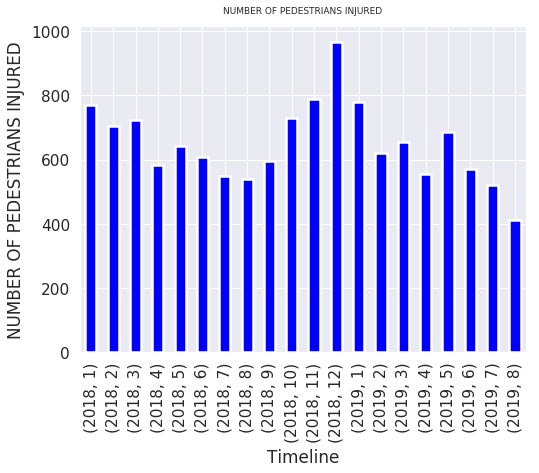

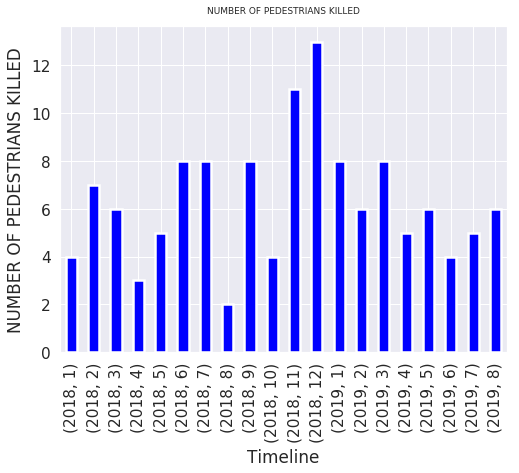

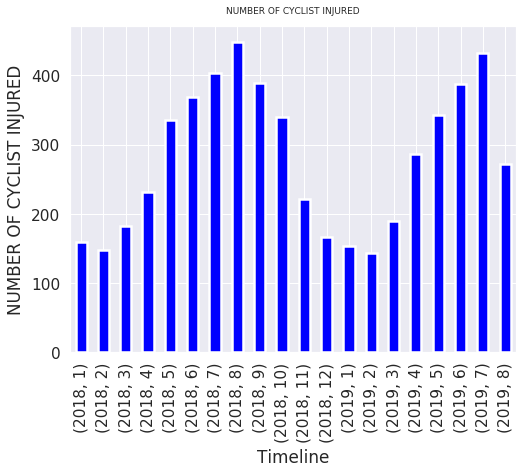

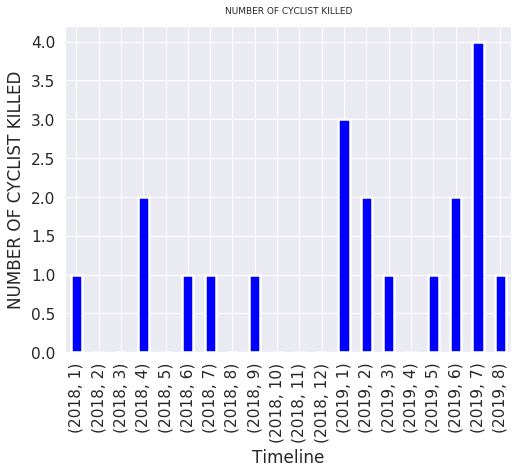

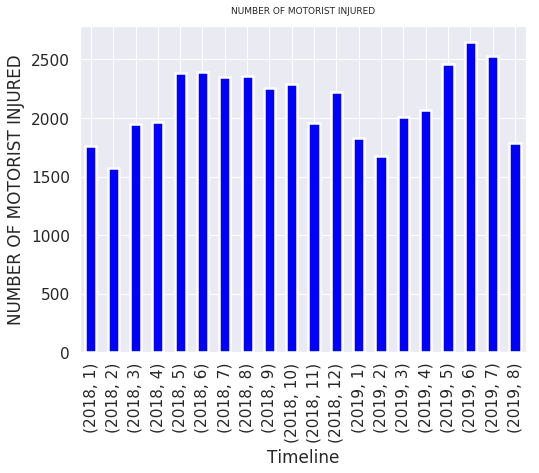

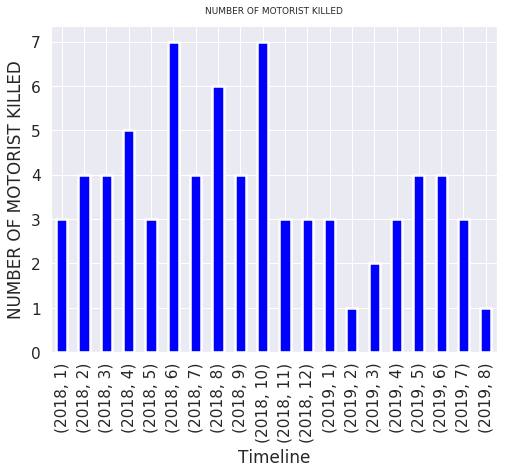

In [8]:
#Total Number of Injured and Kills
Accidents = ['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']
for item in Accidents:
    total_accidents = df[item].groupby([df.DATE.dt.year, df.DATE.dt.month]).sum().plot(kind='bar', figsize=(8, 6), linewidth=2.5, color='blue')
    plt.xlabel("Timeline", labelpad=6)
    plt.ylabel(item, labelpad=6)
    plt.title(item, y=1.02, fontsize=9)
    plt.show()

**ANSWER** - No comparing each month with the same as in the previous year we can say that the accidents for the year 2019 are less than in 2018

<h3>Exercise 3 :</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

The begining of each year January, february and march have less accidents than the overall, probably because it's winter in new york and during christmas period people are mostly in their homes 

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

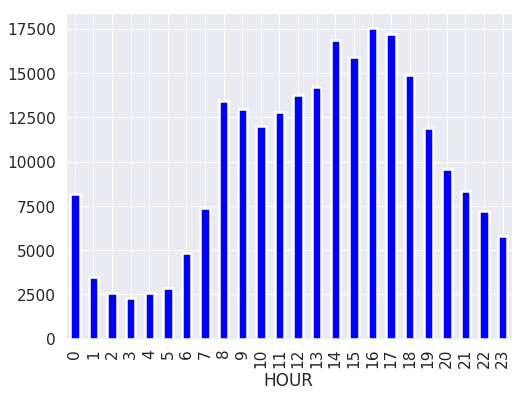

In [9]:
df["TIME"] = pd.to_datetime(df["TIME"])
df['HOUR'] = df['TIME'].dt.hour
total_accidents_daily = df['HOUR'].groupby(df['HOUR']).agg('count').plot(kind='bar', figsize=(8, 6), linewidth=2.5, color='blue')

<p>From the above plot, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

The previous approach is biased because we are not taking into account place of occurence or date, thus in some cities the distribution of daily accidentes can be very different or depending of the month of the year the accidentes can also vary a lot, thus we can't be sure that during the period between 2 - 6 pm occured most of the accidents everywhere in order to suggest a particular safety plan.

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**

Text(0.5,1.02,'Distribution of Accidents')

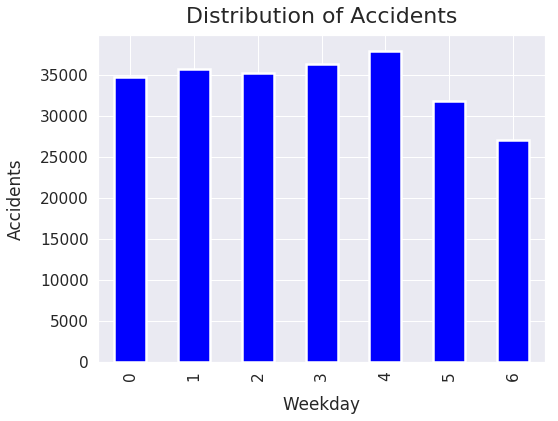

In [10]:
sns.set(font_scale=1.4)
total_accidents = df['DATE'].groupby([df.DATE.dt.weekday]).agg('count').plot(kind='bar', figsize=(8, 6), linewidth=2.5, color='blue')
plt.xlabel("Weekday", labelpad=15)
plt.ylabel("Accidents", labelpad=15)
plt.title("Distribution of Accidents", y=1.02, fontsize=22)

We can see that sunday is the day of the week with less accidents 

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

**Answer.**

Text(0.5,1.02,'Distribution of Accidents per borough')

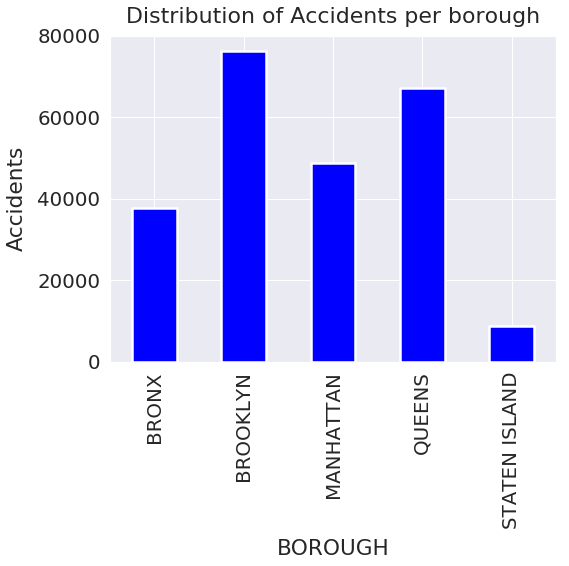

In [11]:
sns.set(font_scale=1.8)
total_accidents = df['BOROUGH'].groupby([df.BOROUGH]).agg('count').plot(kind='bar', figsize=(8, 6), linewidth=2.5, color='blue')
plt.xlabel("BOROUGH", labelpad=10)
plt.ylabel("Accidents", labelpad=10)
plt.title("Distribution of Accidents per borough", y=1.02, fontsize=22)

In [12]:
total_accidents = df['BOROUGH'].groupby([df.BOROUGH]).agg('count')
total_accidents

BOROUGH
BRONX            37709
BROOKLYN         76253
MANHATTAN        48749
QUEENS           67120
STATEN ISLAND     8691
Name: BOROUGH, dtype: int64

In [13]:
total_accidents.index.values

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype=object)

In [14]:
for key, value in cities.items():
    print(value['area'])

42.1
70.82
22.83
108.53
58.37


In [15]:
#update dictionary
cities['BRONX'] = cities.pop('the bronx')
cities['BROOKLYN'] = cities.pop('brooklyn')
cities['MANHATTAN'] = cities.pop('manhattan')
cities['QUEENS'] = cities.pop('queens')
cities['STATEN ISLAND'] = cities.pop('staten island')
cities

{'BRONX': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'BROOKLYN': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'MANHATTAN': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'QUEENS': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'STATEN ISLAND': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

In [16]:
for val in total_accidents.index.values:
    for key, value in cities.items():
        if key == val:
            total_accidents[val] = total_accidents[val]/value['area']

total_accidents

BOROUGH
BRONX             895
BROOKLYN         1076
MANHATTAN        2135
QUEENS            618
STATEN ISLAND     148
Name: BOROUGH, dtype: int64

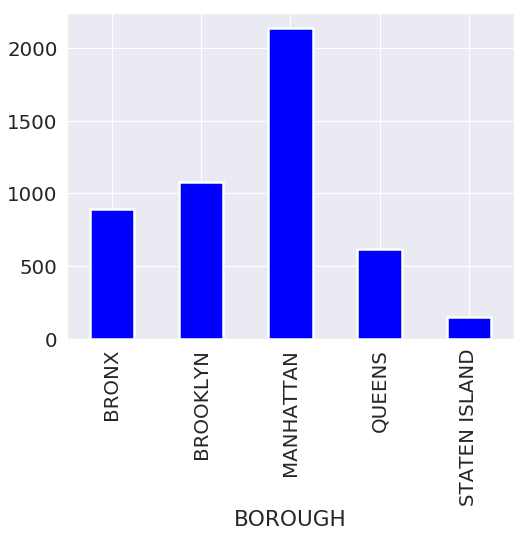

In [17]:
total_accidents.plot(kind='bar', figsize=(8, 6), linewidth=2.5, color='blue')

If we don't consider de area of each borough the place with the highest accidentallity is brookling but considering accidents per square mile we could see that manhatan is the highest, then taking as a parameter the area new findings can come up. 

<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


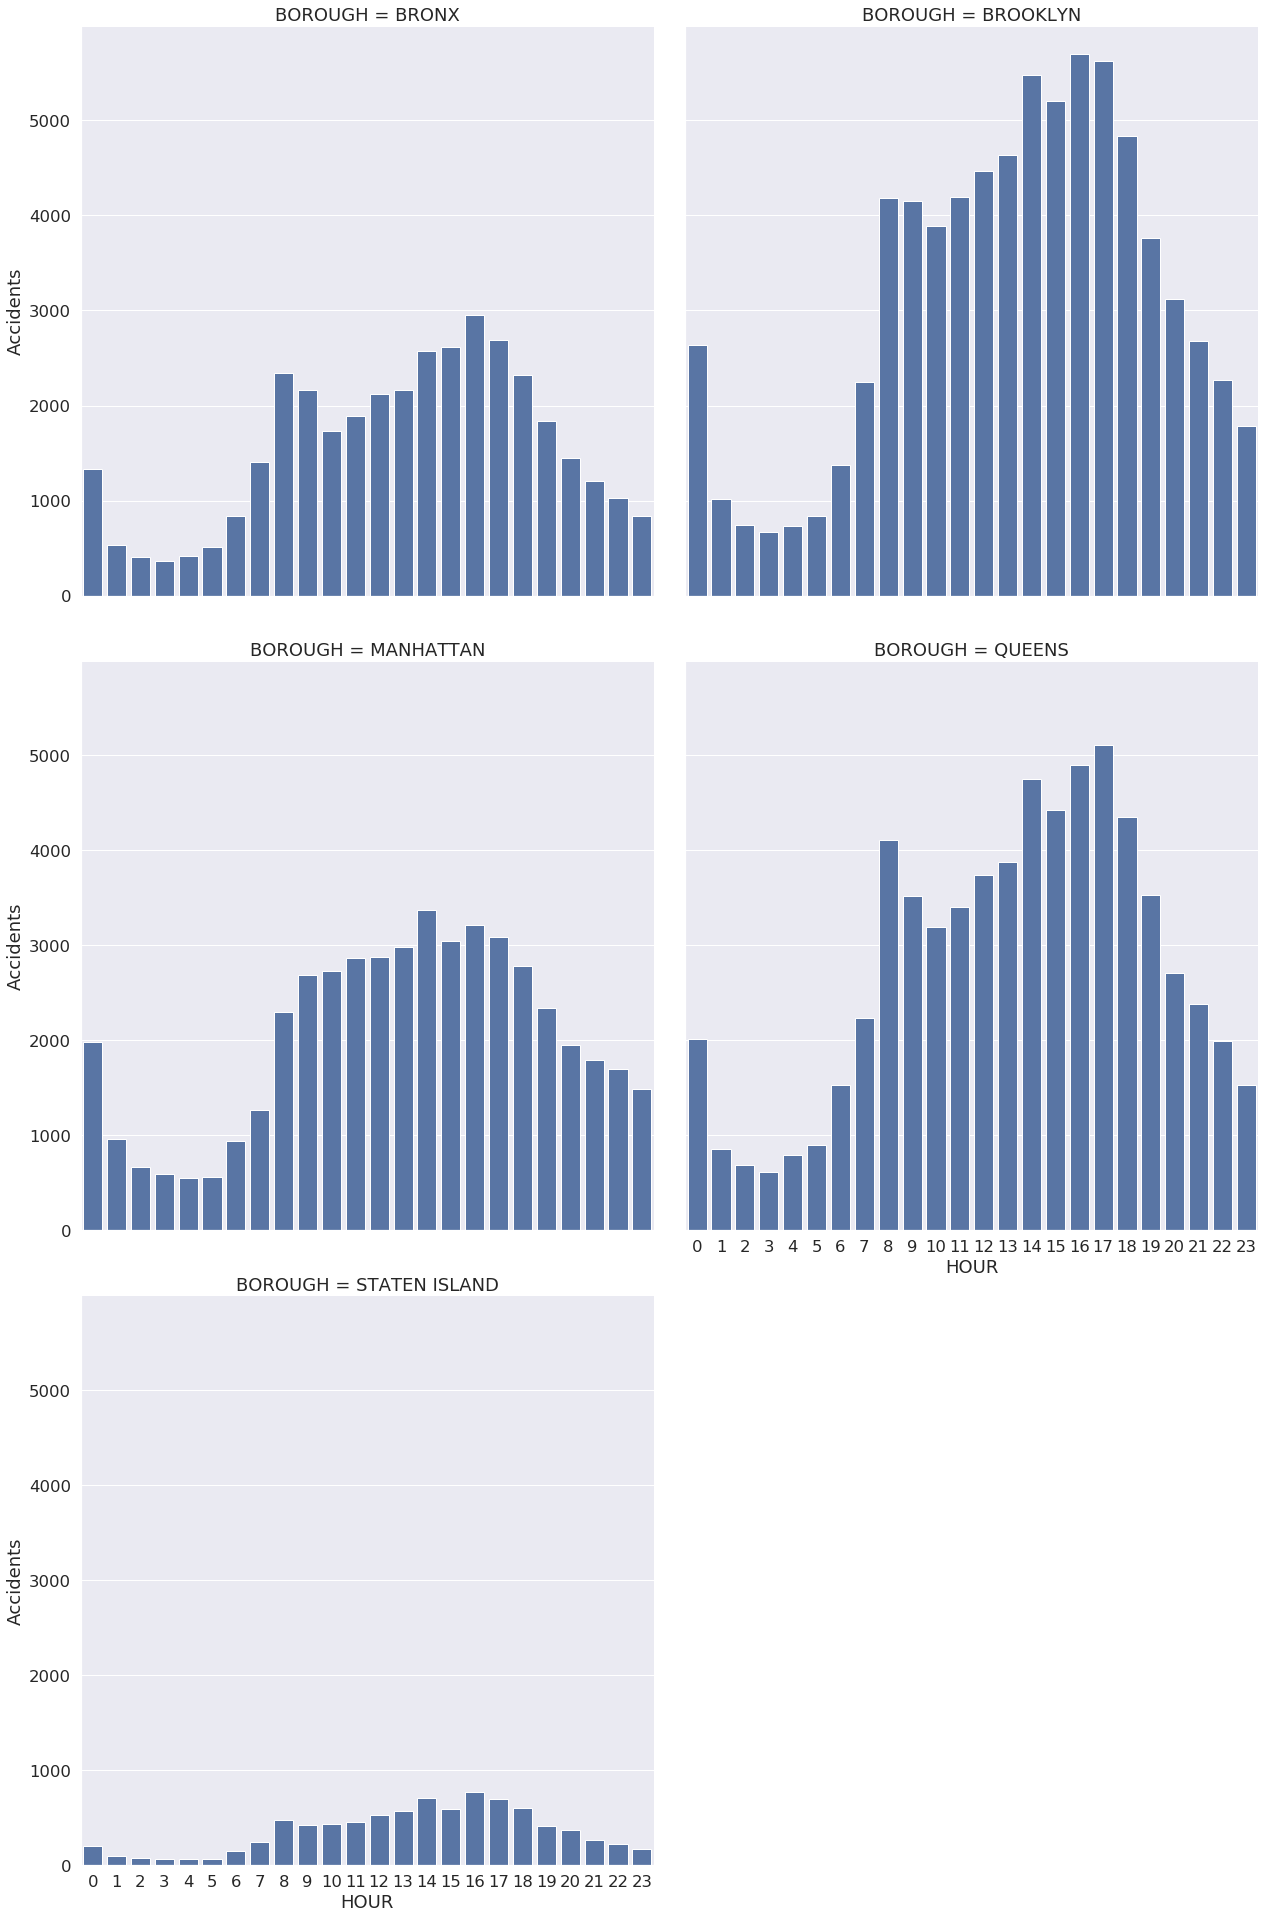

In [18]:
total_accidents = pd.DataFrame(df['BOROUGH'].groupby([df.BOROUGH, df.HOUR]).agg({'accidents':'count'})).reset_index()
total_accidents.columns = ['BOROUGH', 'HOUR', 'Accidents']
sns.set(font_scale=1.5)
g = sns.FacetGrid(total_accidents, col="BOROUGH", col_wrap=2, size=9)
g.map(sns.barplot, "HOUR", "Accidents")

<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

<h3>Exercise 9 :</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

**Answer.**

In [19]:
concat_table = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'], df['CONTRIBUTING FACTOR VEHICLE 2'], df['CONTRIBUTING FACTOR VEHICLE 3'], df['CONTRIBUTING FACTOR VEHICLE 4'], df['CONTRIBUTING FACTOR VEHICLE 5']]).reset_index()
concat_table = concat_table.dropna()
concat_table.columns = ['Index', 'Factors']
concat_table = concat_table.drop_duplicates(["Index", "Factors"])
final_table = concat_table.groupby(['Factors'])['Index'].agg({'Total_Factors':'count'}).reset_index()
final_table = final_table.sort_values(by ='Total_Factors' , ascending=False)
final_table.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


,Factors,Total_Factors
50,Unspecified,190096
8,Driver Inattention/Distraction,61752
14,Failure to Yield Right-of-Way,19641
17,Following Too Closely,17293
4,Backing Unsafely,14835


<h3>Exercise 10 :</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

**Answer.**

In [20]:
concat_table_borough = pd.concat([df['BOROUGH'], df['BOROUGH'], df['BOROUGH'], df['BOROUGH'], df['BOROUGH']]).reset_index()
concat_table_vehicle = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2'], df['VEHICLE TYPE CODE 3'], df['VEHICLE TYPE CODE 4'], df['VEHICLE TYPE CODE 5']]).reset_index()
concat_table_vehicle.columns = ['Index', 'Vehicle_Type']
concat_table_vehicle['BOROUGH'] = concat_table_borough['BOROUGH'].values
final_table_vehicle_borough = concat_table_vehicle.dropna()
final_table_vehicle_borough = final_table_vehicle_borough.drop_duplicates(["Index", "Vehicle_Type"])
final_table_vehicle_borough_grp = final_table_vehicle_borough.groupby(['BOROUGH', 'Vehicle_Type'])['Index'].agg({'Type_count':'count'}).reset_index()
final_table_vehicle_borough_grp = final_table_vehicle_borough_grp.sort_values(by ='Type_count' , ascending=False)
final_table_vehicle_borough_grp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


,BOROUGH,Vehicle_Type,Type_count
510,BROOKLYN,Sedan,39459
1161,QUEENS,Sedan,35103
518,BROOKLYN,Station Wagon/Sport Utility Vehicle,32262
1165,QUEENS,Station Wagon/Sport Utility Vehicle,31647
866,MANHATTAN,Sedan,20727
181,BRONX,Sedan,19652
871,MANHATTAN,Station Wagon/Sport Utility Vehicle,16432
185,BRONX,Station Wagon/Sport Utility Vehicle,15434
459,BROOKLYN,PASSENGER VEHICLE,10177
889,MANHATTAN,Taxi,8989


From the above table we can see that the maximum values are:
    Brookling Sedan 39459
    Queens Sedan 35103
    Manhatan Sedan 20727
    Bronx Sedan 19652
    Staten Island Sedan 4773

<h3>Exercise 11 :</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[ ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[X] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**

I will propose to invest more in technology that can identify the root cause of the accident becuase as we can see in the results 190096 times the reason of the accident was "Unespecified", this is more than 3 times the second most common reason that is "Driver Inattention/Distraction", then it is not worthy to invest in pedestrian refuge islands or more cycle traks, if the driver is distracted.

We can analize for each borough what are the most dangerous factors that can cause deaths

In [21]:
concat_table_borough = pd.concat([df['BOROUGH'], df['BOROUGH'], df['BOROUGH'], df['BOROUGH'], df['BOROUGH']]).reset_index()

df['total_kills'] = df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED'] 
concat_table_kills = pd.concat([df['total_kills'], df['total_kills'], df['total_kills'], df['total_kills'], df['total_kills']]).reset_index()
concat_table_vehicle = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'], df['CONTRIBUTING FACTOR VEHICLE 2'], df['CONTRIBUTING FACTOR VEHICLE 3'], df['CONTRIBUTING FACTOR VEHICLE 4'], df['CONTRIBUTING FACTOR VEHICLE 5']]).reset_index()
concat_table_vehicle.columns = ['Index', 'Factor_type']
concat_table_vehicle['KILLS'] = concat_table_kills['total_kills'].values
concat_table_vehicle['BOROUGH'] = concat_table_borough['BOROUGH'].values
final_table_vehicle_kills = concat_table_vehicle.dropna()
final_table_vehicle_kills = final_table_vehicle_kills.drop_duplicates(["Index", "Factor_type"])
final_table_vehicle_kills_grp = final_table_vehicle_kills.groupby(['BOROUGH','Factor_type']).KILLS.sum().reset_index()
final_table_vehicle_kills_grp = final_table_vehicle_kills_grp.sort_values(by ='KILLS' , ascending=False)
final_table_vehicle_kills_grp

,BOROUGH,Factor_type,KILLS
104,BROOKLYN,Unspecified,49
213,QUEENS,Unspecified,40
177,QUEENS,Failure to Yield Right-of-Way,20
50,BRONX,Unspecified,16
159,MANHATTAN,Unspecified,16
69,BROOKLYN,Failure to Yield Right-of-Way,13
63,BROOKLYN,Driver Inattention/Distraction,12
117,MANHATTAN,Driver Inattention/Distraction,8
212,QUEENS,Unsafe Speed,8
209,QUEENS,Traffic Control Disregarded,8


After this analysis we can focus defining safety plans for each borough

BROOKLYN, QUEENS, BRONX - Focus on the cause "Failure to Yield Right-of-Way", implementing Warning Signs in the intersections were more accidents occured and work harder to find out the root cause of the accidents.

MANHATTAN -Focus on the cause "Driver Inattention/Distraction" we can develop a camera inside the 
steering wheel that can always check the eyes of the driver, and depending on the speed of the vehicle, if the camera detects that the driver is distracted(no eye contact with the road) the camera can take actions like activating the breaks smoothly or give sound alerts inside the vehicle.

STATEN ISLAND - Work harder to find out the root cause of the accidents.

I believe that there is no system that can reduce accidents to zero but we can work on the severity of the accident reducing deaths to zero

<h3>Exercise 12 :</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

In [22]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,HOUR,total_kills
237229,2018-01-01,2020-09-04 19:30:00,QUEENS,11432.0,40.708410,-73.80328,PARSONS BOULEVARD,0,0,0,...,NaN,NaN,3820560,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,19,0
230620,2018-01-01,2020-09-04 04:00:00,BROOKLYN,11212.0,40.659330,-73.92027,NaN,0,0,0,...,NaN,NaN,3821032,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,4,0
235340,2018-01-01,2020-09-04 13:30:00,QUEENS,11372.0,40.747734,-73.88300,83 STREET,0,0,0,...,NaN,NaN,3821647,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,13,0
230632,2018-01-01,2020-09-04 21:30:00,BROOKLYN,11234.0,40.619130,-73.92398,EAST 53 STREET,1,0,0,...,NaN,NaN,3821772,NaN,NaN,NaN,NaN,NaN,21,0
228737,2018-01-01,2020-09-04 17:36:00,QUEENS,11417.0,40.675060,-73.85148,PITKIN AVENUE,0,0,0,...,NaN,NaN,3819065,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,17,0


In [23]:
df['total_kills'] = df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED'] 
concat_table_kills = pd.concat([df['total_kills'], df['total_kills'], df['total_kills'], df['total_kills'], df['total_kills']]).reset_index()
concat_table_vehicle = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2'], df['VEHICLE TYPE CODE 3'], df['VEHICLE TYPE CODE 4'], df['VEHICLE TYPE CODE 5']]).reset_index()
concat_table_vehicle.columns = ['Index', 'Vehicle_Type']
concat_table_vehicle['KILLS'] = concat_table_kills['total_kills'].values
final_table_vehicle_kills = concat_table_vehicle.dropna()
final_table_vehicle_kills = final_table_vehicle_kills.drop_duplicates(["Index", "Vehicle_Type"])
final_table_vehicle_kills_grp = final_table_vehicle_kills.groupby(['Vehicle_Type']).KILLS.sum().reset_index()
final_table_vehicle_kills_grp = final_table_vehicle_kills_grp.sort_values(by ='KILLS' , ascending=False)
final_table_vehicle_kills_grp.head()

,Vehicle_Type,KILLS
405,Station Wagon/Sport Utility Vehicle,87
395,Sedan,65
289,Motorcycle,22
318,PASSENGER VEHICLE,21
381,SPORT UTILITY / STATION WAGON,20
